In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.__version__

'1.3.0'

In [3]:
np.__version__

'1.13.1'

In [4]:
author = "kyubyong. https://github.com/Kyubyong/tensorflow-exercises"

In [5]:
np.random.seed(0)

Q1. Let's practice the seq2seq framework with a simple example. In this example, we will take the last state of the encoder as the initial state of the decoder. Complete the code.

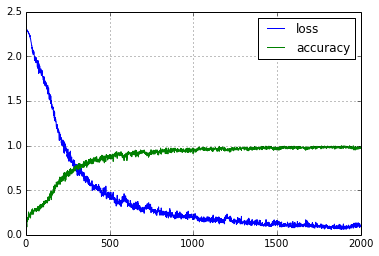

In [6]:
# Inputs and outputs: ten digits
x = tf.placeholder(tf.int32, shape=(32, 10))
y = tf.placeholder(tf.int32, shape=(32, 10))

# One-hot encoding
enc_inputs = tf.one_hot(x, 10)
dec_inputs = tf.concat((tf.zeros_like(y[:, :1]), y[:, :-1]), -1)
dec_inputs = tf.one_hot(dec_inputs, 10)

# encoder
encoder_cell = tf.contrib.rnn.GRUCell(128)
memory, last_state = tf.nn.dynamic_rnn(encoder_cell, enc_inputs, dtype=tf.float32, scope="encoder")

# decoder
decoder_cell = ...
outputs, _ = ...

# Readout
logits = tf.layers.dense(outputs, 10)
preds = tf.argmax(logits, -1, output_type=tf.int32)

# Evaluation
hits = tf.reduce_sum(tf.to_float(tf.equal(preds, y)))
acc = hits / tf.to_float(tf.size(x))

# Loss and train
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
mean_loss = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001)
train_op = opt.minimize(mean_loss)

# Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses, accs = [], []
    for step in range(2000):
        # Data design
        # We feed sequences of random digits in the `x`,
        # and take its reverse as the target.
        _x = np.random.randint(0, 10, size=(32, 10), dtype=np.int32)
        _y = _x[:, ::-1] # Reverse
        _, _loss, _acc = sess.run([train_op, mean_loss, acc], {x:_x, y:_y})
        losses.append(_loss)
        accs.append(_acc)
    
    # Plot
    plt.plot(losses, label="loss")
    plt.plot(accs, label="accuracy")
    plt.legend()
    plt.grid()
    plt.show()

Q2. At this time, we will use the Bahdanau attention mechanism. Complete the code.

step= 0


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


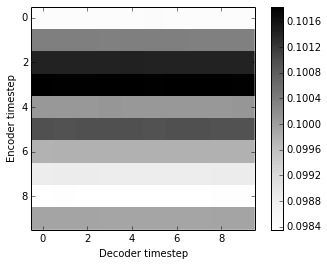

step= 100


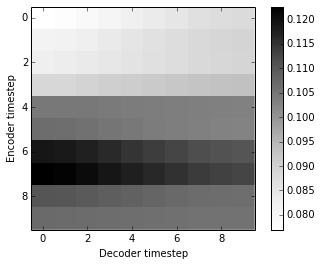

step= 200


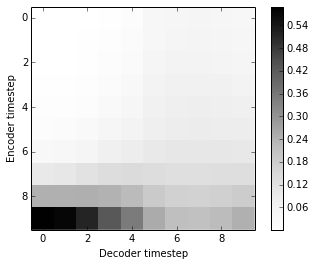

step= 300


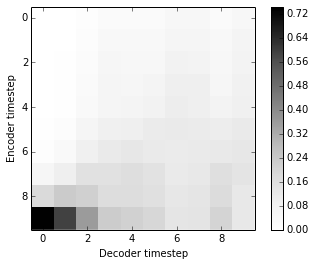

step= 400


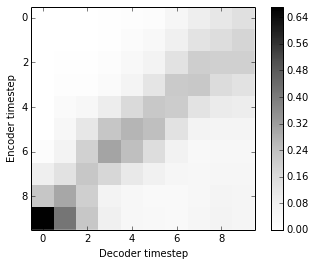

step= 500


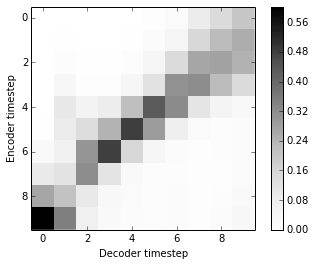

step= 600


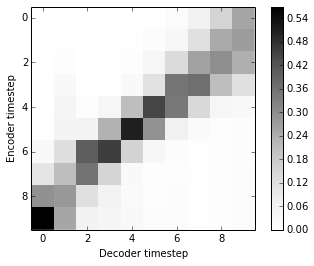

step= 700


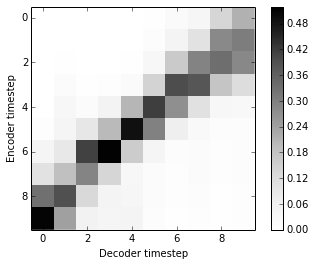

step= 800


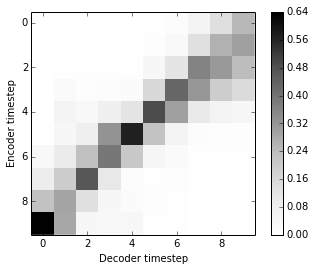

step= 900


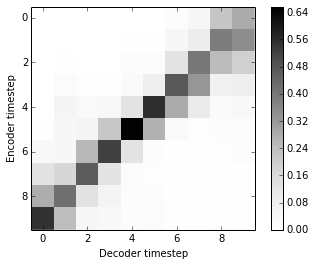

step= 1000


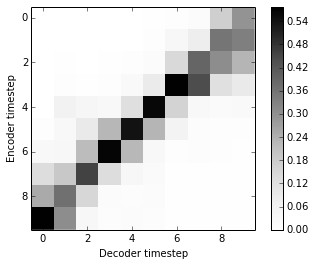

step= 1100


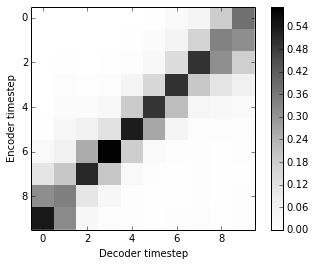

step= 1200


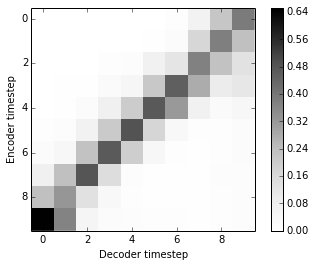

step= 1300


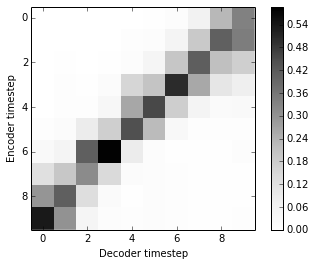

step= 1400


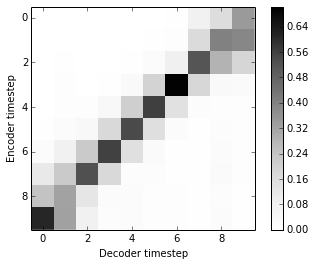

step= 1500


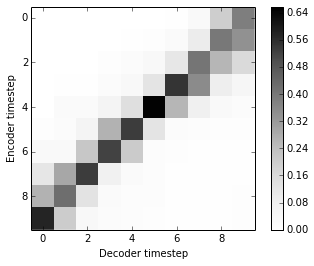

step= 1600


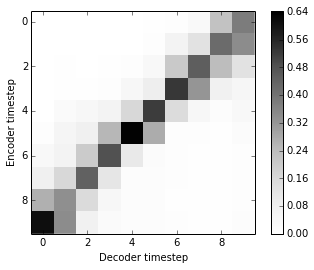

step= 1700


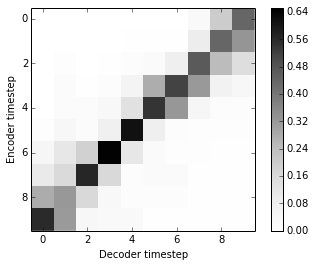

step= 1800


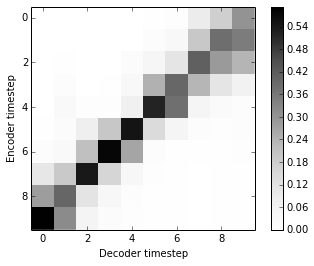

step= 1900


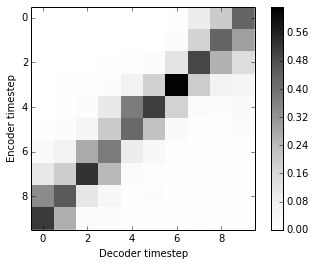

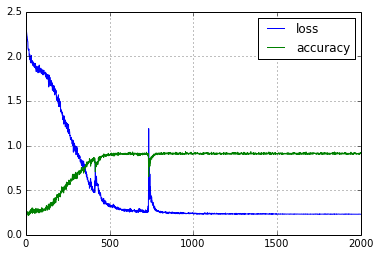

In [7]:
tf.reset_default_graph()
# Inputs and outputs: ten digits
x = tf.placeholder(tf.int32, shape=(32, 10))
y = tf.placeholder(tf.int32, shape=(32, 10))

# One-hot encoding
enc_inputs = tf.one_hot(x, 10)
dec_inputs = tf.concat((tf.zeros_like(y[:, :1]), y[:, :-1]), -1)
dec_inputs = tf.one_hot(dec_inputs, 10)

# encoder
encoder_cell = tf.contrib.rnn.GRUCell(128)
memory, last_state = tf.nn.dynamic_rnn(encoder_cell, enc_inputs, dtype=tf.float32, scope="encoder")

# decoder
attention_mechanism = ...                                              
decoder_cell = tf.contrib.rnn.GRUCell(128)
cell_with_attention = tf.contrib.seq2seq.AttentionWrapper(...)
outputs, state = tf.nn.dynamic_rnn(cell_with_attention, dec_inputs, dtype=tf.float32)
alignments = ...

# Readout
logits = tf.layers.dense(outputs, 10)
preds = tf.argmax(logits, -1, output_type=tf.int32)

# Evaluation
hits = tf.reduce_sum(tf.to_float(tf.equal(preds, y)))
acc = hits / tf.to_float(tf.size(x))

# Loss and train
loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
mean_loss = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001)
train_op = opt.minimize(mean_loss)

# Session
def plot_alignment(alignment):
    fig, ax = plt.subplots()
    im=ax.imshow(alignment, cmap='Greys', interpolation='none')
    fig.colorbar(im, ax=ax)
    plt.xlabel('Decoder timestep')
    plt.ylabel('Encoder timestep')
    plt.show()
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    losses, accs = [], []
    for step in range(2000):
        # Data design
        # We feed sequences of random digits in the `x`,
        # and take its reverse as the target.
        _x = np.random.randint(0, 10, size=(32, 10), dtype=np.int32)
        _y = _x[:, ::-1] # Reverse
        _, _loss, _acc = sess.run([train_op, mean_loss, acc], {x:_x, y:_y})
        losses.append(_loss)
        accs.append(_acc)
        
        if step % 100 == 0:
            print("step=", step)
            _alignments = sess.run(alignments, {x: _x, y: _y})
            plot_alignment(_alignments[0])
    
    # Plot
    plt.plot(losses, label="loss")
    plt.plot(accs, label="accuracy")
    plt.legend()
    plt.grid()
    plt.show()
   